In [3]:
import pandas as pd
import numpy as np

In [2]:
df_raw = pd.read_csv("ruwe-gegevens-van-stiptheid-d-1.csv", sep=";")

df_raw.head()

,Date of departure,Train number,Relation,Railway operator,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,Delay at departure,Relation direction,Stopping place,Arrival line,Planned arrival date,Planned departure date,Actual arrival date,Actual departure date
0,2025-05-22,1713,IC 14,SNCB/NMBS,96,13:46:18,13:52:41,13:45:00,13:50:00,78.0,161.0,IC 14: QUIEVRAIN -> TONGEREN,MONS,97,2025-05-22,2025-05-22,2025-05-22,2025-05-22
1,2025-05-22,1713,IC 14,SNCB/NMBS,96,13:57:37,13:57:37,13:55:00,13:55:00,157.0,157.0,IC 14: QUIEVRAIN -> TONGEREN,GHLIN,96,2025-05-22,2025-05-22,2025-05-22,2025-05-22
2,2025-05-22,1713,IC 14,SNCB/NMBS,96,14:01:10,14:02:17,13:59:00,14:00:00,130.0,137.0,IC 14: QUIEVRAIN -> TONGEREN,JURBISE,96,2025-05-22,2025-05-22,2025-05-22,2025-05-22
3,2025-05-22,1713,IC 14,SNCB/NMBS,96,14:06:25,14:06:25,14:05:00,14:05:00,85.0,85.0,IC 14: QUIEVRAIN -> TONGEREN,NEUFVILLES,96,2025-05-22,2025-05-22,2025-05-22,2025-05-22
4,2025-05-22,1713,IC 14,SNCB/NMBS,96,14:19:20,14:19:20,14:20:00,14:20:00,-40.0,-40.0,IC 14: QUIEVRAIN -> TONGEREN,HENNUYERES-GARAGE,96,2025-05-22,2025-05-22,2025-05-22,2025-05-22


In [3]:
df_raw.tail()

,Date of departure,Train number,Relation,Railway operator,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,Delay at departure,Relation direction,Stopping place,Arrival line,Planned arrival date,Planned departure date,Actual arrival date,Actual departure date
73180,2025-05-22,3385,L B5-1,SNCB/NMBS,26,14:20:12,14:21:10,14:18:00,14:18:00,182.0,190.0,L B5-1: MECHELEN -> EDINGEN,MOENSBERG,26,2025-05-22,2025-05-22,2025-05-22,2025-05-22
73181,2025-05-22,3385,L B5-1,SNCB/NMBS,94,14:35:49,14:38:07,14:36:00,14:38:00,-10.0,7.0,L B5-1: MECHELEN -> EDINGEN,HALLE,94,2025-05-22,2025-05-22,2025-05-22,2025-05-22
73182,2025-05-22,3405,IC 11,SNCB/NMBS,108,NaN,05:20:11,NaN,05:20:00,NaN,11.0,IC 11: BINCHE -> TURNHOUT,BINCHE,NaN,NaN,2025-05-22,NaN,2025-05-22
73183,2025-05-22,3405,IC 11,SNCB/NMBS,108,05:24:00,05:25:12,05:24:00,05:25:00,0.0,12.0,IC 11: BINCHE -> TURNHOUT,LEVAL,108,2025-05-22,2025-05-22,2025-05-22,2025-05-22
73184,2025-05-22,3405,IC 11,SNCB/NMBS,117,05:51:44,05:51:44,05:52:00,05:52:00,-16.0,-16.0,IC 11: BINCHE -> TURNHOUT,FAMILLEUREUX,117,2025-05-22,2025-05-22,2025-05-22,2025-05-22


In [4]:
df_raw.columns

Index(['Date of departure', 'Train number', 'Relation', 'Railway operator',
       'Departure line', 'Actual arrival time', 'Actual departure time',
       'Planned arrival time', 'Planned departure time', 'Delay at arrival',
       'Delay at departure', 'Relation direction', 'Stopping place',
       'Arrival line', 'Planned arrival date', 'Planned departure date',
       'Actual arrival date', 'Actual departure date'],
      dtype='object')

In [5]:
df_raw.isnull().sum()

Date of departure            0
Train number                 0
Relation                     0
Railway operator             0
Departure line            3515
Actual arrival time       3523
Actual departure time     3515
Planned arrival time      3523
Planned departure time    3515
Delay at arrival          3523
Delay at departure        3515
Relation direction        4102
Stopping place               0
Arrival line              3523
Planned arrival date      3523
Planned departure date    3515
Actual arrival date       3523
Actual departure date     3515
dtype: int64

Some columns have missing data. Will drop missing rows in columns planned departure time and actual departure time. 

In [6]:
df_raw.describe()

,Train number,Delay at arrival,Delay at departure
count,73185.000000,69662.000000,69670.000000
mean,3728.493052,157.566536,159.958002
std,2662.579130,354.918905,348.666174
min,10.000000,-1055.000000,-1055.000000
25%,2059.000000,2.000000,11.000000
50%,3220.000000,56.000000,55.000000
75%,4865.000000,178.000000,175.000000
max,19975.000000,5622.000000,5622.000000


In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73185 entries, 0 to 73184
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date of departure       73185 non-null  object 
 1   Train number            73185 non-null  int64  
 2   Relation                73185 non-null  object 
 3   Railway operator        73185 non-null  object 
 4   Departure line          69670 non-null  object 
 5   Actual arrival time     69662 non-null  object 
 6   Actual departure time   69670 non-null  object 
 7   Planned arrival time    69662 non-null  object 
 8   Planned departure time  69670 non-null  object 
 9   Delay at arrival        69662 non-null  float64
 10  Delay at departure      69670 non-null  float64
 11  Relation direction      69083 non-null  object 
 12  Stopping place          73185 non-null  object 
 13  Arrival line            69662 non-null  object 
 14  Planned arrival date    69662 non-null

Remove rows with missing time stamp

In [8]:
df_clean = df_raw.dropna(subset=[
    "Planned departure time",
    "Actual departure time",
    "Planned departure date",
    "Actual departure date"
])

In [9]:
df_clean["Planned departure time"] = df_clean["Planned departure time"].astype(str)
df_clean["Planned departure date"] = df_clean["Planned departure date"].astype(str)
df_clean["Actual departure time"] = df_clean["Actual departure time"].astype(str)
df_clean["Actual departure date"] = df_clean["Actual departure date"].astype(str)

# Remove legacy Excel ghost time values 
df_clean = df_clean[
    ~df_clean["Planned departure time"].str.contains("1899") &
    ~df_clean["Actual departure time"].str.contains("1899")
]

C:\Users\maini\AppData\Local\Temp\ipykernel_7784\566743879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Planned departure time"] = df_clean["Planned departure time"].astype(str)
C:\Users\maini\AppData\Local\Temp\ipykernel_7784\566743879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Planned departure date"] = df_clean["Planned departure date"].astype(str)
C:\Users\maini\AppData\Local\Temp\ipykernel_7784\566743879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a

In [10]:
# create a complete date time objects 

df_clean["planned_departure"] = pd.to_datetime(
    df_clean["Planned departure date"] + " " + df_clean["Planned departure time"]
)

df_clean["actual_departure"] = pd.to_datetime(
    df_clean["Actual departure date"] + " " + df_clean["Actual departure time"]
)

In [11]:
df_clean = df_clean.dropna(subset=["planned_departure", "actual_departure"])


In [12]:
# calculate delays

df_clean["departure_delay_min"] = (
    (df_clean["actual_departure"] - df_clean["planned_departure"]).dt.total_seconds() / 60
)

# Determine if the departure was on time (within 6 minutes)
df_clean["on_time_departure"] = df_clean["departure_delay_min"] < 6

In [13]:
df_clean.head()

,Date of departure,Train number,Relation,Railway operator,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,...,Stopping place,Arrival line,Planned arrival date,Planned departure date,Actual arrival date,Actual departure date,planned_departure,actual_departure,departure_delay_min,on_time_departure
0,2025-05-22,1713,IC 14,SNCB/NMBS,96,13:46:18,13:52:41,13:45:00,13:50:00,78.0,...,MONS,97,2025-05-22,2025-05-22,2025-05-22,2025-05-22,2025-05-22 13:50:00,2025-05-22 13:52:41,2.683333,True
1,2025-05-22,1713,IC 14,SNCB/NMBS,96,13:57:37,13:57:37,13:55:00,13:55:00,157.0,...,GHLIN,96,2025-05-22,2025-05-22,2025-05-22,2025-05-22,2025-05-22 13:55:00,2025-05-22 13:57:37,2.616667,True
2,2025-05-22,1713,IC 14,SNCB/NMBS,96,14:01:10,14:02:17,13:59:00,14:00:00,130.0,...,JURBISE,96,2025-05-22,2025-05-22,2025-05-22,2025-05-22,2025-05-22 14:00:00,2025-05-22 14:02:17,2.283333,True
3,2025-05-22,1713,IC 14,SNCB/NMBS,96,14:06:25,14:06:25,14:05:00,14:05:00,85.0,...,NEUFVILLES,96,2025-05-22,2025-05-22,2025-05-22,2025-05-22,2025-05-22 14:05:00,2025-05-22 14:06:25,1.416667,True
4,2025-05-22,1713,IC 14,SNCB/NMBS,96,14:19:20,14:19:20,14:20:00,14:20:00,-40.0,...,HENNUYERES-GARAGE,96,2025-05-22,2025-05-22,2025-05-22,2025-05-22,2025-05-22 14:20:00,2025-05-22 14:19:20,-0.666667,True


In [14]:
total_trains = len(df_clean)
on_time_trains = df_clean["on_time_departure"].sum()
punctuality_rate = on_time_trains / total_trains * 100

punctuality_rate

np.float64(87.86856535844507)

My realistic punctuality rate is 87.87%

In [15]:
df_monthly_punctuality = pd.read_csv("nationale-stiptheid-per-maand.csv", sep=";")

df_monthly_punctuality.head()

,Year,Month,Punctuality in percent,Number of train spottings,Number of train spottings with a delay inferior to 6 minutes,Minutes of delay,Punctuality after neutralization,Number of train spottings with a delay inferior to 6 minutes after neutralization,Number of train spottings YTD,Number of train spottings with a delay inferior to 6 minutes YTD,Punctuality YTD in percent
0,2016,2016-01,89.869343,100033,89899,212787,95.992323,96024,100033,89899,89.869343
1,2016,2016-07,92.928819,100153,93071,161023,98.227712,98378,694659,626479,90.185112
2,2016,2016-12,89.229160,107104,95568,229134,93.439087,100077,1215011,1083620,89.186024
3,2017,2017-02,89.011352,99985,88998,224076,92.567885,92554,207816,186820,89.896832
4,2018,2018-01,88.580531,114261,101213,259583,92.048030,105175,114261,101213,88.580531


In [16]:
df_monthly_punctuality.tail()

,Year,Month,Punctuality in percent,Number of train spottings,Number of train spottings with a delay inferior to 6 minutes,Minutes of delay,Punctuality after neutralization,Number of train spottings with a delay inferior to 6 minutes after neutralization,Number of train spottings YTD,Number of train spottings with a delay inferior to 6 minutes YTD,Punctuality YTD in percent
108,2023,2023-09,86.679033,109977,95327,278705,90.430726,99453,977137,863075,88.326918
109,2023,2023-11,81.971017,99989,81962,324445,87.150587,87140,1191311,1042655,87.521646
110,2024,2024-08,92.260878,107790,99448,178535,94.393729,101747,888058,797678,89.822737
111,2024,2024-09,89.033660,113666,101201,246854,92.133971,104725,1001724,898879,89.733200
112,2024,2024-11,87.788675,108383,95148,258772,91.733021,99423,1229228,1100626,89.537986


In [17]:
df_monthly_punctuality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 11 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Year                                                                               113 non-null    int64  
 1   Month                                                                              113 non-null    object 
 2   Punctuality in percent                                                             113 non-null    float64
 3   Number of train spottings                                                          113 non-null    int64  
 4   Number of train spottings with a delay inferior to 6 minutes                       113 non-null    int64  
 5   Minutes of delay                                                                   113 non-null    int64  

In [18]:
df_monthly_punctuality.describe()

,Year,Punctuality in percent,Number of train spottings,Number of train spottings with a delay inferior to 6 minutes,Minutes of delay,Punctuality after neutralization,Number of train spottings with a delay inferior to 6 minutes after neutralization,Number of train spottings YTD,Number of train spottings with a delay inferior to 6 minutes YTD,Punctuality YTD in percent
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,1.130000e+02,1.130000e+02,113.000000
mean,2020.221239,89.825540,108047.256637,97044.442478,222749.548673,93.360788,100838.477876,6.833903e+05,6.161893e+05,90.273143
std,2.737747,3.104110,7138.617500,7241.262087,54547.176794,2.320060,6706.490750,3.775092e+05,3.394534e+05,1.877724
min,2016.000000,81.950697,62159.000000,60410.000000,46729.000000,87.150587,60875.000000,1.000330e+05,8.989900e+04,86.938037
25%,2018.000000,88.155742,104994.000000,93087.000000,191581.000000,92.048030,97409.000000,3.326130e+05,3.031920e+05,89.038462
50%,2020.000000,90.009897,109198.000000,97822.000000,217472.000000,93.439087,101297.000000,6.628950e+05,5.969940e+05,90.185112
75%,2023.000000,91.822421,112912.000000,102176.000000,259583.000000,94.864548,105693.000000,9.994160e+05,9.061390e+05,91.258017
max,2025.000000,97.186248,119121.000000,107590.000000,343014.000000,98.227989,110133.000000,1.344850e+06,1.237407e+06,93.950573


In [19]:
df_monthly_punctuality.columns

Index(['Year', 'Month', 'Punctuality in percent', 'Number of train spottings',
       'Number of train spottings with a delay inferior to 6 minutes',
       'Minutes of delay', 'Punctuality after neutralization',
       'Number of train spottings with a delay inferior to 6 minutes after neutralization',
       'Number of train spottings YTD',
       'Number of train spottings with a delay inferior to 6 minutes YTD',
       'Punctuality YTD in percent'],
      dtype='object')

In [20]:
df_monthly_punctuality.isnull().sum()

Year                                                                                 0
Month                                                                                0
Punctuality in percent                                                               0
Number of train spottings                                                            0
Number of train spottings with a delay inferior to 6 minutes                         0
Minutes of delay                                                                     0
Punctuality after neutralization                                                     0
Number of train spottings with a delay inferior to 6 minutes after neutralization    0
Number of train spottings YTD                                                        0
Number of train spottings with a delay inferior to 6 minutes YTD                     0
Punctuality YTD in percent                                                           0
dtype: int64

In [21]:
latest_official = df_monthly_punctuality[
    (df_monthly_punctuality["Month"] == "2025-05")
    ].iloc[0]

latest_official

Year                                                                                      2025
Month                                                                                  2025-05
Punctuality in percent                                                               91.513704
Number of train spottings                                                               110920
Number of train spottings with a delay inferior to 6 minutes                            101507
Minutes of delay                                                                        197652
Punctuality after neutralization                                                     94.178687
Number of train spottings with a delay inferior to 6 minutes after neutralization       104463
Number of train spottings YTD                                                           516416
Number of train spottings with a delay inferior to 6 minutes YTD                        471271
Punctuality YTD in percent                        

In [22]:
official_punctuality = latest_official["Punctuality in percent"]
official_punctuality_neutralized = latest_official["Punctuality after neutralization"]
official_train_count = latest_official["Number of train spottings"]
official_on_time_count = latest_official["Number of train spottings with a delay inferior to 6 minutes"]

print(f"Official punctuality (no neutralization): {official_punctuality:.2f}%")
print(f"Official punctuality (with neutralization): {official_punctuality_neutralized:.2f}%")
print(f"Official train count: {official_train_count}")
print(f"Official on-time count: {official_on_time_count}")

Official punctuality (no neutralization): 91.51%
Official punctuality (with neutralization): 94.18%
Official train count: 110920
Official on-time count: 101507


In [23]:

print(f"Month: May 2025")
print(f"Official NMBS Punctuality: {official_punctuality:.2f}%")
print(f"Based on Departure Times: {punctuality_rate:.2f}%")
print(f"Difference: {punctuality_rate - official_punctuality:+.2f}%")


Month: May 2025
Official NMBS Punctuality: 91.51%
Based on Departure Times: 87.87%
Difference: -3.65%


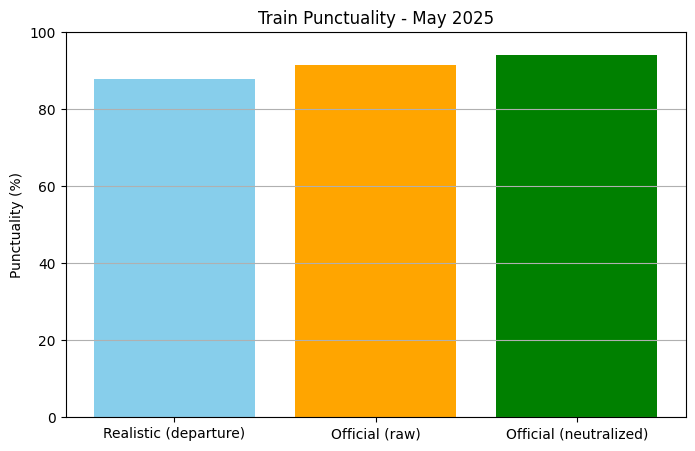

In [24]:
import matplotlib.pyplot as plt

labels = ["Realistic (departure)", "Official (raw)", "Official (neutralized)"]
values = [punctuality_rate, official_punctuality, official_punctuality_neutralized]

plt.figure(figsize=(8,5))
plt.bar(labels, values, color=["skyblue", "orange", "green"])
plt.ylabel("Punctuality (%)")
plt.title("Train Punctuality - May 2025")
plt.ylim(0, 100)
plt.grid(axis="y")
plt.show()


Delays per Route

In [25]:
route_stats = (
    df_clean
    .groupby("Relation")
    .agg(
        train_count=("departure_delay_min", "count"),
        avg_delay_min=("departure_delay_min", "mean"),
        median_delay_min=("departure_delay_min", "median"),
        on_time_pct=("on_time_departure", "mean")
    )
)


route_stats = route_stats[route_stats["train_count"] >= 1]

# Convert on_time_pct to percent
route_stats["on_time_pct"] *= 100

# Sort by average delay descending
route_stats = route_stats.sort_values("avg_delay_min", ascending=False)

route_stats.head(10)  


,train_count,avg_delay_min,median_delay_min,on_time_pct
Relation,,,,
EURST,866,12.463972,5.866667,50.346420
INT,641,10.109698,2.550000,71.138846
ICE,312,7.061699,4.608333,63.141026
IC 07,1655,5.046133,1.833333,73.353474
EXTRA,102,5.041176,2.275000,68.627451
IC 11,976,4.700768,1.450000,79.098361
L A5,40,4.551250,1.925000,87.500000
L A2,1225,4.525020,1.333333,80.571429
L B19,941,4.207687,1.450000,87.035069


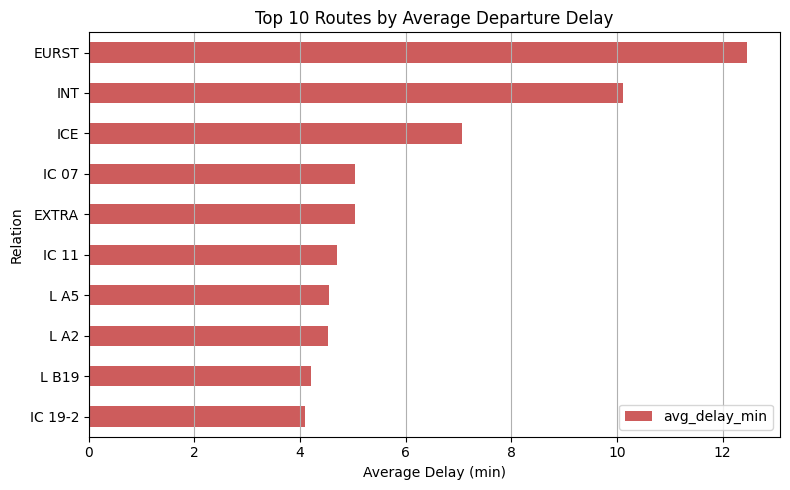

In [26]:
route_stats.head(10).sort_values("avg_delay_min").plot(
    y="avg_delay_min", kind='barh', figsize=(8, 5), color="indianred"
)
plt.xlabel("Average Delay (min)")
plt.title("Top 10 Routes by Average Departure Delay")
plt.grid(axis="x")
plt.tight_layout()
plt.show()

 Delays per Station

In [27]:
station_stats = (
    df_clean
    .groupby("Stopping place")
    .agg(
        train_count=("departure_delay_min", "count"),
        avg_delay_min=("departure_delay_min", "mean"),
        on_time_pct=("on_time_departure", "mean")
    )
)


station_stats = station_stats[station_stats["train_count"] >= 1]

# Convert to %
station_stats["on_time_pct"] *= 100

# Sort by avg delay
station_stats = station_stats.sort_values("avg_delay_min", ascending=False)

station_stats.head(10)


,train_count,avg_delay_min,on_time_pct
Stopping place,,,
MONTZEN-N,2,18.083333,0.000000
ANTWERPEN-OOST,11,12.472727,54.545455
ANTWERPEN-DAM,11,12.151515,54.545455
MACHELEN,21,7.171429,61.904762
SCHAARBEEK-PERRON P.C.I.,21,7.139683,61.904762
ANTWERPEN-LUCHTBAL,210,7.112063,73.333333
MORTSEL-OUDE GOD,218,6.993960,68.348624
MECHELEN-NEKKERSPOEL,309,6.834574,72.168285
KAPELLEN,102,6.461438,77.450980


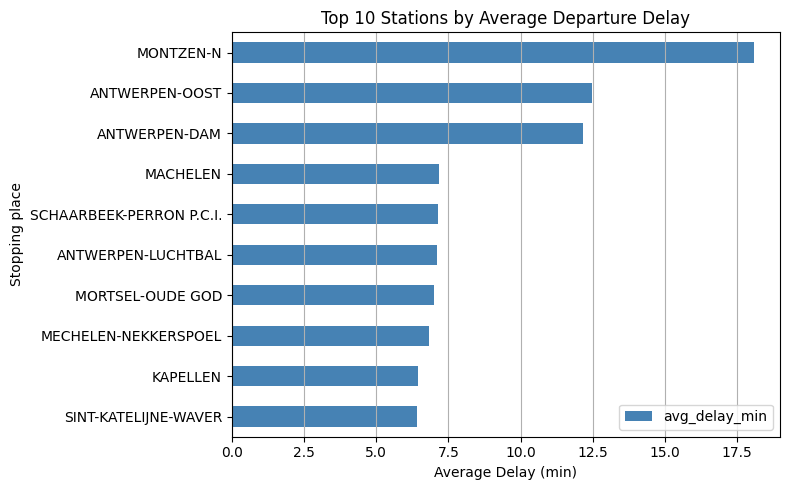

In [28]:
station_stats.head(10).sort_values("avg_delay_min").plot(
    y="avg_delay_min", kind="barh", figsize=(8, 5), color="steelblue"
)
plt.xlabel("Average Delay (min)")
plt.title("Top 10 Stations by Average Departure Delay")
plt.grid(axis="x")
plt.tight_layout()
plt.show()


Question two

In [4]:
links_df = pd.read_csv("stiptheid-gegevens-maandelijksebestanden.csv", sep=";")
links_df.head()

,Month,Link to data
0,2024-02,https://fr.ftp.opendatasoft.com/infrabel/Punct...
1,2024-05,https://fr.ftp.opendatasoft.com/infrabel/Punct...
2,2024-07,https://fr.ftp.opendatasoft.com/infrabel/Punct...
3,2024-08,https://fr.ftp.opendatasoft.com/infrabel/Punct...
4,2024-01,https://fr.ftp.opendatasoft.com/infrabel/Punct...


Combine all the datasets per month for the year 2024 into one dataset.

In [5]:
import requests
from io import StringIO 

all_months = []

for url in links_df["Link to data"]:
    response = requests.get(url)
    if response.status_code == 200:
        month_df = pd.read_csv(StringIO(response.text))
        all_months.append(month_df)
    else:
        print(f"Failed to load: {url}")


df_2024 = pd.concat(all_months, ignore_index=True)

In [6]:
df_2024.head()

,DATDEP,TRAIN_NO,RELATION,TRAIN_SERV,PTCAR_NO,THOP1_COD,LINE_NO_DEP,REAL_TIME_ARR,REAL_TIME_DEP,PLANNED_TIME_ARR,...,DELAY_ARR,DELAY_DEP,CIRC_TYP,RELATION_DIRECTION,PTCAR_LG_NM_NL,LINE_NO_ARR,PLANNED_DATE_ARR,PLANNED_DATE_DEP,REAL_DATE_ARR,REAL_DATE_DEP
0,01FEB2024,2029,IC 07,SNCB/NMBS,376,NaN,12,NaN,6:47:01,NaN,...,NaN,61.0,1,IC 07: ESSEN -> CHARLEROI-CENTRAL,ESSEN,NaN,NaN,01FEB2024,NaN,01FEB2024
1,01FEB2024,2029,IC 07,SNCB/NMBS,1244,D,12,6:51:06,6:51:06,6:50:00,...,66.0,66.0,1,IC 07: ESSEN -> CHARLEROI-CENTRAL,WILDERT,12,01FEB2024,01FEB2024,01FEB2024,01FEB2024
2,01FEB2024,2029,IC 07,SNCB/NMBS,630,=,12,6:53:52,6:55:04,6:54:00,...,-7.0,4.0,1,IC 07: ESSEN -> CHARLEROI-CENTRAL,KALMTHOUT,12,01FEB2024,01FEB2024,01FEB2024,01FEB2024
3,01FEB2024,2029,IC 07,SNCB/NMBS,637,D,12,6:56:26,6:56:26,6:57:00,...,-34.0,-34.0,1,IC 07: ESSEN -> CHARLEROI-CENTRAL,KIJKUIT,12,01FEB2024,01FEB2024,01FEB2024,01FEB2024
4,01FEB2024,2029,IC 07,SNCB/NMBS,539,=,12,6:58:09,6:59:14,6:58:00,...,9.0,14.0,1,IC 07: ESSEN -> CHARLEROI-CENTRAL,HEIDE,12,01FEB2024,01FEB2024,01FEB2024,01FEB2024


In [7]:
df_2024.tail()

,DATDEP,TRAIN_NO,RELATION,TRAIN_SERV,PTCAR_NO,THOP1_COD,LINE_NO_DEP,REAL_TIME_ARR,REAL_TIME_DEP,PLANNED_TIME_ARR,...,DELAY_ARR,DELAY_DEP,CIRC_TYP,RELATION_DIRECTION,PTCAR_LG_NM_NL,LINE_NO_ARR,PLANNED_DATE_ARR,PLANNED_DATE_DEP,REAL_DATE_ARR,REAL_DATE_DEP
23114723,31DEC2024,17306,EXTRA,SNCB/NMBS,1073,NaN,59,21:03:30,21:04:10,20:34:10,...,1760.0,1750.0,1,NaN,SINAAI,59,31DEC2024,31DEC2024,31DEC2024,31DEC2024
23114724,31DEC2024,17306,EXTRA,SNCB/NMBS,749,NaN,59,21:07:05,21:07:05,20:38:00,...,1745.0,1745.0,1,NaN,LOKEREN-OOST,59,31DEC2024,31DEC2024,31DEC2024,31DEC2024
23114725,31DEC2024,17306,EXTRA,SNCB/NMBS,748,NaN,57,21:09:05,21:10:28,20:40:00,...,1745.0,1768.0,1,NaN,LOKEREN,59,31DEC2024,31DEC2024,31DEC2024,31DEC2024
23114726,31DEC2024,17306,EXTRA,SNCB/NMBS,1265,NaN,57,21:16:01,21:17:17,20:47:00,...,1741.0,1757.0,1,NaN,ZELE,57,31DEC2024,31DEC2024,31DEC2024,31DEC2024
23114727,31DEC2024,17306,EXTRA,SNCB/NMBS,319,NaN,NaN,21:24:33,NaN,20:55:00,...,1773.0,NaN,1,NaN,DENDERMONDE,57,31DEC2024,NaN,31DEC2024,NaN


In [8]:
df_2024.isnull().sum()

DATDEP                      0
TRAIN_NO                    0
RELATION                    0
TRAIN_SERV                  0
PTCAR_NO                    0
THOP1_COD             2322285
LINE_NO_DEP           1148052
REAL_TIME_ARR         1149470
REAL_TIME_DEP         1147900
PLANNED_TIME_ARR      1149470
PLANNED_TIME_DEP      1147901
DELAY_ARR             1149392
DELAY_DEP             1147817
CIRC_TYP                    0
RELATION_DIRECTION    1455893
PTCAR_LG_NM_NL              0
LINE_NO_ARR           1149625
PLANNED_DATE_ARR      1149470
PLANNED_DATE_DEP      1147901
REAL_DATE_ARR         1149470
REAL_DATE_DEP         1147900
dtype: int64

In [9]:
df_2024.columns

Index(['DATDEP', 'TRAIN_NO', 'RELATION', 'TRAIN_SERV', 'PTCAR_NO', 'THOP1_COD',
       'LINE_NO_DEP', 'REAL_TIME_ARR', 'REAL_TIME_DEP', 'PLANNED_TIME_ARR',
       'PLANNED_TIME_DEP', 'DELAY_ARR', 'DELAY_DEP', 'CIRC_TYP',
       'RELATION_DIRECTION', 'PTCAR_LG_NM_NL', 'LINE_NO_ARR',
       'PLANNED_DATE_ARR', 'PLANNED_DATE_DEP', 'REAL_DATE_ARR',
       'REAL_DATE_DEP'],
      dtype='object')

Drop missing rows from the needed columns, Delay_Dep and Delay_ARR

In [10]:
df_cleaned = df_2024.dropna(subset=[
    "DELAY_DEP",
    "DELAY_ARR"
])

df_cleaned["DELAY_CHANGE"] = df_cleaned["DELAY_DEP"] - df_cleaned["DELAY_ARR"]


C:\Users\maini\AppData\Local\Temp\ipykernel_42172\252537744.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["DELAY_CHANGE"] = df_cleaned["DELAY_DEP"] - df_cleaned["DELAY_ARR"]


In [11]:
station_delay_change =  (df_cleaned.groupby("PTCAR_LG_NM_NL")["DELAY_CHANGE"]
                         .mean().round(2))

In [12]:
worst_stations = station_delay_change.sort_values(ascending=False).head(5)


best_stations = station_delay_change.sort_values(ascending=True).head(5)


print("Stations where most time is lost:")
print(worst_stations)
print("\nStations where most time is gained:")
print(best_stations)

Stations where most time is lost:
PTCAR_LG_NM_NL
MERELBEKE-CENTRAAL           707.00
TURNHOUT                     464.00
ANTWERPEN-NOORD-BUNDEL A1    444.07
RONET-P.E.                   181.00
MONTZEN                      175.00
Name: DELAY_CHANGE, dtype: float64

Stations where most time is gained:
PTCAR_LG_NM_NL
VORST-RIJTUIGEN-DIENSTPERRON   -70.00
BOOM                           -48.71
OUDENAARDE                     -39.19
EINE                           -31.25
WONDELGEM-BUNDEL               -31.17
Name: DELAY_CHANGE, dtype: float64


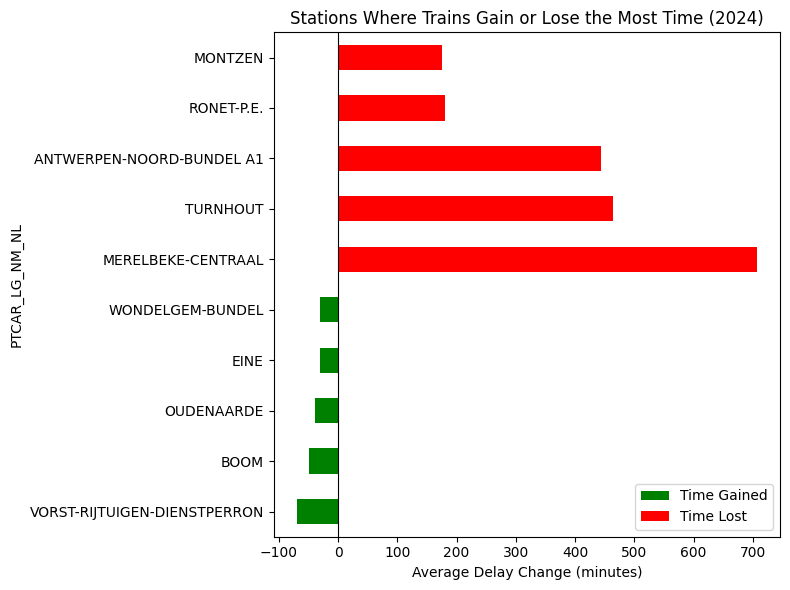

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Combine data and set colors
combined = pd.concat([best_stations, worst_stations])
colors = ["green"] * 5 + ["red"] * 5


combined.plot(kind="barh", color=colors, figsize=(8, 6))
plt.axvline(0, color="black", linewidth=0.8)
plt.xlabel("Average Delay Change (minutes)")
plt.title("Stations Where Trains Gain or Lose the Most Time (2024)")

# Add custom legend
legend_elements = [
    Patch(facecolor='green', label='Time Gained'),
    Patch(facecolor='red', label='Time Lost')
]
plt.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()
